In [ ]:
%pip install azure-ai-vision-imageanalysis

## Helper Function

In [2]:
from matplotlib import pyplot as plt
import cv2

def show_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Convert the image from BGR to RGB for displaying with matplotlib,
    # because OpenCV uses BGR by default and matplotlib expects RGB.
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with matplotlib.
    plt.imshow(img_rgb)
    plt.axis("off")  # Turn off axis labels.
    plt.show()

## Load Azure Configuration

In [3]:
import os
azure_computer_vision_endpoint = os.environ["AZURE_COMPUTER_VISION_ENDPOINT"]
azure_computer_vision_key = os.environ["AZURE_COMPUTER_VISION_KEY"]

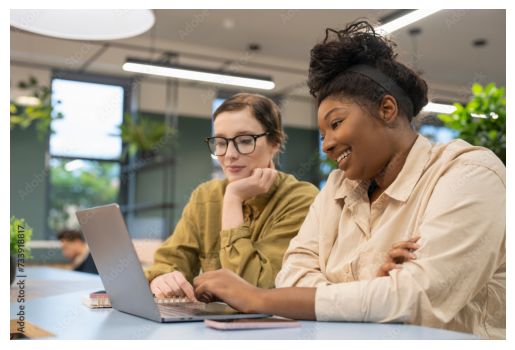

In [4]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

image = "../Data/images/image_analysis.jpg"
show_image(image)

# Read the image file as bytes
with open(image, "rb") as image_file:
    image_data = image_file.read()

# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=azure_computer_vision_endpoint,
    credential=AzureKeyCredential(azure_computer_vision_key)
)

## Caption, Dense Captions, Tags

In [ ]:
# Get the feature for the image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.CAPTION, VisualFeatures.DENSE_CAPTIONS, VisualFeatures.TAGS],
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

print("Dense Captions:")
for item in result.dense_captions['values']:
    print(f"   '{item['text']}', Confidence {item['confidence']:.4f}")

print("Tags:")
for item in result.tags['values']:
    print(f"   '{item['name']}', Confidence {item['confidence']:.4f}")

Caption:
   'a group of women looking at a laptop', Confidence 0.8003
Dense Captions:
   'a group of women looking at a laptop', Confidence 0.8003
   'a person using a laptop', Confidence 0.6873
   'a group of women sitting at a table looking at a laptop', Confidence 0.7766
   'a person in glasses looking at a laptop', Confidence 0.7197
   'a close up of a person's face wearing glasses', Confidence 0.8064
   'blur a blurry picture of a window', Confidence 0.7301
   'a person smiling at something', Confidence 0.6836
   'a close up of a white plate', Confidence 0.7882
   'blur a blurry image of a window', Confidence 0.7391
   'a blurry image of a plant', Confidence 0.7734
Tags:
   'person', Confidence 0.9959
   'clothing', Confidence 0.9925
   'human face', Confidence 0.9852
   'indoor', Confidence 0.9411
   'laptop', Confidence 0.9277
   'computer', Confidence 0.8835
   'sitting', Confidence 0.8741
   'office building', Confidence 0.8416
   'table', Confidence 0.8114
   'window', Confid

## Objects

In [15]:
# Get the feature for the image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.OBJECTS],
    gender_neutral_caption=True,  # Optional (default is False)
)

 # Print Objects analysis results to the console
print(" Objects:")
if result.objects is not None:
    for object in result.objects.list:
        print(f"   '{object.tags[0].name}', {object.bounding_box}, Confidence: {object.tags[0].confidence:.4f}")
print(f" Image height: {result.metadata.height}")
print(f" Image width: {result.metadata.width}")

 Objects:
   'Laptop', {'x': 141, 'y': 395, 'w': 295, 'h': 229}, Confidence: 0.7950
   'person', {'x': 439, 'y': 40, 'w': 548, 'h': 608}, Confidence: 0.9180
   'person', {'x': 266, 'y': 170, 'w': 371, 'h': 433}, Confidence: 0.8700
 Image height: 667
 Image width: 1000


## Smart Crops

Thumbnails often need to have a certain aspect ratio, where aspect ratio is defined as the width in pixels divided by the height in pixels. For example, 1.0 for a square image, or 1.77 for a 16:9 widescreen image.

You can optionally request one or more aspect ratios by setting the `smart_crops_aspect_ratios` argument in the call to `analyze`. Supported values are from 0.75 to 1.8 (inclusive).

If you do not set this value, the service will return one result with an aspect ratio it sees fit between 0.5 and 2.0 (inclusive).

In [34]:
# Do Smart Cropping analysis on an image stream. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.SMART_CROPS],
    smart_crops_aspect_ratios=[1.0],  # Optional. Specify one more desired aspect ratios    
)

if result.smart_crops is not None:
    for smart_crop in result.smart_crops.list:
        print(f"   Aspect ratio {smart_crop.aspect_ratio}: Smart crop {smart_crop.bounding_box}")
print(f" Image height: {result.metadata.height}")
print(f" Image width: {result.metadata.width}")
print(f" Model version: {result.model_version}")


   Aspect ratio 1.0: Smart crop {'x': 83, 'y': 0, 'w': 662, 'h': 661}
 Image height: 667
 Image width: 1000
 Model version: 2023-10-01


## Show Cropped Image

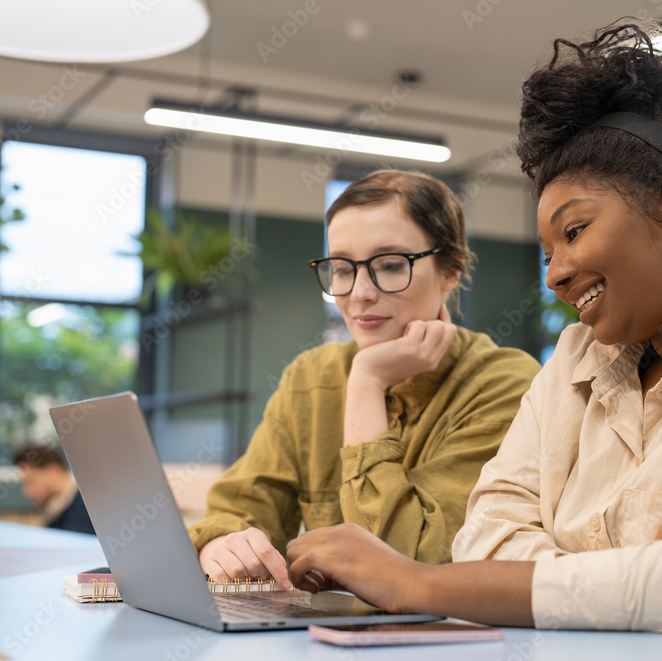

In [35]:
from PIL import Image

# Load the original image
original_image = Image.open(image)

# Define the bounding box (x, y, w, h)
bounding_box = {'x': 83, 'y': 0, 'w': 662, 'h': 661}

# Crop the image using the bounding box
cropped_image = original_image.crop((bounding_box['x'], bounding_box['y'], 
                                     bounding_box['x'] + bounding_box['w'], 
                                     bounding_box['y'] + bounding_box['h']))

# Display the cropped image
cropped_image.show()

## People

In [36]:
# Find people in an image stream. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.PEOPLE]
)

# Print People analysis results to the console
print(" People:")
if result.people is not None:
    for person in result.people.list:
        print(f"   {person.bounding_box}, Confidence {person.confidence:.4f}")
print(f" Image height: {result.metadata.height}")
print(f" Image width: {result.metadata.width}")
print(f" Model version: {result.model_version}")

 People:
   {'x': 269, 'y': 165, 'w': 358, 'h': 428}, Confidence 0.9321
   {'x': 364, 'y': 10, 'w': 635, 'h': 654}, Confidence 0.9289
   {'x': 93, 'y': 443, 'w': 90, 'h': 93}, Confidence 0.0548
   {'x': 554, 'y': 207, 'w': 316, 'h': 264}, Confidence 0.0026
 Image height: 667
 Image width: 1000
 Model version: 2023-10-01


## Text

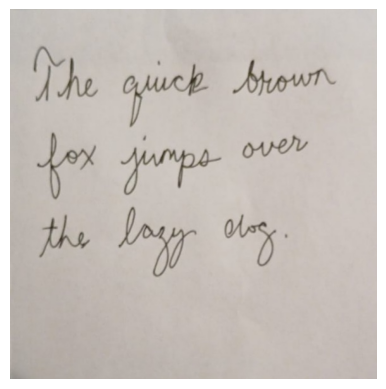

Image analysis results:
 Read:
   Line: 'The quick brown', Bounding box [{'x': 51, 'y': 92}, {'x': 513, 'y': 79}, {'x': 515, 'y': 131}, {'x': 51, 'y': 147}]
     Word: 'The', Bounding polygon [{'x': 53, 'y': 92}, {'x': 141, 'y': 90}, {'x': 141, 'y': 145}, {'x': 52, 'y': 147}], Confidence 0.7840
     Word: 'quick', Bounding polygon [{'x': 175, 'y': 89}, {'x': 311, 'y': 85}, {'x': 312, 'y': 140}, {'x': 175, 'y': 145}], Confidence 0.8420
     Word: 'brown', Bounding polygon [{'x': 365, 'y': 83}, {'x': 508, 'y': 79}, {'x': 512, 'y': 128}, {'x': 368, 'y': 137}], Confidence 0.8930
   Line: 'fox jumps over', Bounding box [{'x': 48, 'y': 204}, {'x': 471, 'y': 187}, {'x': 475, 'y': 243}, {'x': 48, 'y': 264}]
     Word: 'fox', Bounding polygon [{'x': 50, 'y': 204}, {'x': 137, 'y': 205}, {'x': 138, 'y': 262}, {'x': 50, 'y': 264}], Confidence 0.9240
     Word: 'jumps', Bounding polygon [{'x': 178, 'y': 204}, {'x': 321, 'y': 199}, {'x': 324, 'y': 251}, {'x': 179, 'y': 261}], Confidence 0.9530
     

In [39]:
image = "../Data/images/ocr.jpg"
show_image(image)

# Read the image file as bytes
with open(image, "rb") as image_file:
    image_data = image_file.read()


# Extract text (OCR) from an image stream. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.READ]
)

# Print text (OCR) analysis results to the console
print("Image analysis results:")
print(" Read:")
if result.read is not None:
    for line in result.read.blocks[0].lines:
        print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
        for word in line.words:
            print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")

print(f" Image height: {result.metadata.height}")
print(f" Image width: {result.metadata.width}")